In [1]:
import numpy as np
import requests
import lxml.html as lh
import pandas as pd

In [2]:
link = "http://cocl.us/Geospatial_data"
coordinates = pd.read_csv(link)
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [3]:
coordinates.rename(columns={"Postal Code": "PostalCode"}, inplace=True)
coordinates.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [4]:
CanadaData = "https://raw.githack.com/johnsg811/GitHub_Sample/master/df_can.csv"
df2 =  pd.read_csv(CanadaData,index_col=[0])
df2.rename(columns={"Postcode": "PostalCode"}, inplace=True)
df2.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge ,Malvern"
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union"
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [5]:
toronto = df2.groupby(["PostalCode", "Borough"], as_index=False).agg(lambda x: ", ".join(x))
toronto.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge ,Malvern"
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union"
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [6]:
toronto_df_new = toronto.merge(coordinates, on="PostalCode", how="left")
toronto_df_new

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge ,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park ,Ionview ,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea ,Golden Mile ,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest ,Cliffside ,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff ,Cliffside West",43.692657,-79.264848


In [7]:
!pip -q install folium

In [100]:
import pandas as pd
import numpy as np
import folium
import requests
from sklearn.cluster import KMeans

In [101]:
toronto_df_new.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge ,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek ,Rouge Hill ,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood ,Morningside ,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df_new['Borough'].unique()),
        toronto_df_new.shape[0]
    )
)

The dataframe has 11 boroughs and 103 neighborhoods.


In [11]:
toronto_df_new.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)

In [12]:
toronto_df_new.groupby('Borough').count()['Neighborhood']


Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           11
Mississauga          1
North York          24
Queen's Park         1
Scarborough         17
West Toronto         6
York                 5
Name: Neighborhood, dtype: int64

In [13]:

#Create new dataset
toronto_df = toronto_df_new[toronto_df_new['Borough'].str.contains('Toronto')]
toronto_df.reset_index(inplace=True)
toronto_df.drop('index', axis=1, inplace=True)
toronto_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West ,Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West ,India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [14]:
print(toronto_df.groupby('Borough').count()['Neighborhood'])

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64


In [102]:
boroughs = toronto_df['Borough'].unique().tolist()

In [16]:
lat_toronto = toronto_df['Latitude'].mean()
lon_toronto = toronto_df['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

from geopy.geocoders import Nominatim
from tqdm import tqdm
from collections import deque
import matplotlib.cm as cm
import matplotlib.colors as colors

address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Toronto are 43.66727739999999, -79.39353346923077
The geograpical coordinate of Toronto are 43.653963, -79.387207.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [17]:
borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) #Random color

In [28]:
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)

for lat, lng, borough, neighborhood in zip(toronto_df['Latitude'], 
                                           toronto_df['Longitude'],
                                           toronto_df['Borough'], 
                                           toronto_df['Neighborhood']):
    label_text = borough + ' - ' + neighborhood
    label = folium.Popup(label_text, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        tooltip = label_text,
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill=True,
        fill_color=borough_color[borough],
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [37]:
CLIENT_ID = 'UHA10UJE255NFHH2T2ZQZ2FUAOUI33BQ3RDH0UZX4YPDYZFO' # your Foursquare ID
CLIENT_SECRET = 'XKXYDJAJMC3QM1N2E2W0R0HS3BYQ4S15MRVYPBFYSX4WDV2F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius

In [38]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [105]:













#Get venues for all neighborhoods in our dataset
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                latitudes=toronto_df['Latitude'],
                                longitudes=toronto_df['Longitude'],
                                radius=radius)

The Beaches 
The Danforth West ,Riverdale 
The Beaches West ,India Bazaar 
Studio District 
Lawrence Park 
Davisville North 
North Toronto West 
Davisville 
Moore Park ,Summerhill East 
Deer Park ,Forest Hill SE ,Rathnelly ,South Hill ,Summerhill West 
Rosedale 
Cabbagetown ,St. James Town 
Church and Wellesley 
Harbourfront 
Ryerson ,Garden District 
St. James Town 
Berczy Park 
Central Bay Street 
Adelaide ,King ,Richmond 
Harbourfront East ,Toronto Islands ,Union Station 
Design Exchange ,Toronto Dominion Centre 
Commerce Court ,Victoria Hotel 
Roselawn 
Forest Hill North ,Forest Hill West 
The Annex ,North Midtown ,Yorkville 
Harbord ,University of Toronto 
Chinatown ,Grange Park ,Kensington Market 
CN Tower ,Bathurst Quay ,Island airport ,Harbourfront West ,King and Spadina ,Railway Lands ,South Niagara 
Stn A PO Boxes 25 The Esplanade 
First Canadian Place ,Underground city 
Christie 
Dovercourt Village ,Dufferin 
Little Portugal ,Trinity 
Brockton ,Exhibition Place ,Parkdale Vil

In [123]:
print(toronto_venues.shape)
toronto_venues.head()

(3900, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
1,The Beaches,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
2,The Beaches,43.676357,-79.293031,Kew Gardens,43.669038,-79.298538,Park
3,The Beaches,43.676357,-79.293031,Bagels On Fire,43.672864,-79.286784,Bagel Shop
4,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail


In [124]:
print(toronto_venues.shape)
toronto_venues.head()

(3900, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
1,The Beaches,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
2,The Beaches,43.676357,-79.293031,Kew Gardens,43.669038,-79.298538,Park
3,The Beaches,43.676357,-79.293031,Bagels On Fire,43.672864,-79.286784,Bagel Shop
4,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail


In [125]:
toronto_venues.groupby("Neighborhood").Venue.count().sort_values(ascending=False).head()

Neighborhood
The Danforth West ,Riverdale                 100
Church and Wellesley                         100
First Canadian Place ,Underground city       100
Dovercourt Village ,Dufferin                 100
Design Exchange ,Toronto Dominion Centre     100
Name: Venue, dtype: int64

In [120]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 178 uniques categories.


In [129]:
from collections import deque
Toronto_OHE = pd.get_dummies(toronto_venues["Venue Category"],
                             prefix = "",
                             prefix_sep = "")

Toronto_OHE["Neighborhood"] = toronto_venues["Neighborhood"]


nindex = list(Toronto_OHE.columns).index("Neighborhood")
cols = deque(Toronto_OHE.columns)
cols.rotate(-nindex)
cols = list(cols)
Toronto_OHE = Toronto_OHE[cols]

Toronto_OHE.head()

,Neighborhood,New American Restaurant,Nightclub,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,...,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Nail Salon
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
Toronto_OHE.shape

(3900, 178)

In [131]:
Toronto_grouped = Toronto_OHE.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()

,Neighborhood,New American Restaurant,Nightclub,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,...,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Nail Salon
0,"Adelaide ,King ,Richmond",0.00,0.0,0.01,0.0,0.0,0.00,0.03,0.0,0.01,...,0.00,0.01,0.02,0.01,0.01,0.01,0.01,0.0,0.0,0.0
1,Berczy Park,0.00,0.0,0.00,0.0,0.0,0.00,0.03,0.0,0.01,...,0.00,0.02,0.01,0.01,0.01,0.01,0.01,0.0,0.0,0.0
2,"Brockton ,Exhibition Place ,Parkdale Village",0.01,0.0,0.01,0.0,0.0,0.01,0.06,0.0,0.00,...,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.0,0.0,0.0
3,Business Reply Mail Processing Centre 969 East...,0.00,0.0,0.00,0.0,0.0,0.00,0.06,0.0,0.01,...,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.0,0.0,0.0
4,"CN Tower ,Bathurst Quay ,Island airport ,Harbo...",0.01,0.0,0.00,0.0,0.0,0.01,0.06,0.0,0.01,...,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.0,0.0,0.0


In [132]:
Toronto_grouped.shape

(39, 178)

In [133]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [134]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide ,King ,Richmond",Coffee Shop,Hotel,Italian Restaurant,Japanese Restaurant,Sandwich Place,Restaurant,Gym,Café,Theater,Park
1,Berczy Park,Coffee Shop,Hotel,Restaurant,Park,Sandwich Place,Farmers Market,Japanese Restaurant,Gym,Theater,Concert Hall
2,"Brockton ,Exhibition Place ,Parkdale Village",Café,Park,Bakery,French Restaurant,Pizza Place,Bar,Restaurant,Italian Restaurant,Sandwich Place,Cocktail Bar
3,Business Reply Mail Processing Centre 969 East...,Coffee Shop,Park,Café,Brewery,Beach,Bakery,Bar,Gastropub,Greek Restaurant,American Restaurant
4,"CN Tower ,Bathurst Quay ,Island airport ,Harbo...",Park,Café,Hotel,Bakery,Pizza Place,Steakhouse,Gym,Italian Restaurant,Vegetarian / Vegan Restaurant,Brewery


In [135]:
from sklearn.decomposition import PCA
pca = PCA(.95)
Toronto_grouped_clustering = pca.fit_transform(Toronto_grouped.drop('Neighborhood', 1))
Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)


In [136]:
Toronto_grouped_clustering.shape



(39, 177)

In [137]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(kmeans.labels_.shape)

[2 2 0 3 2 1 2 0 0 1]
(39,)


In [138]:
Toronto_grouped["Cluster Labels"] = kmeans.labels_

# add clustering labels
Toronto_combined = toronto_df.merge(Toronto_grouped, left_on = "Neighborhood", right_on = "Neighborhood", how = "outer")

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Toronto_combined = Toronto_combined.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Toronto_combined["Cluster Labels"] = Toronto_combined["Cluster Labels"].fillna(5).astype("int")

Toronto_combined.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,New American Restaurant,Nightclub,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,0.0,0.0,0.00,0.01,...,Park,Coffee Shop,Gastropub,Café,Brewery,Beach,Ice Cream Shop,American Restaurant,Pub,Breakfast Spot
1,M4K,East Toronto,"The Danforth West ,Riverdale",43.679557,-79.352188,0.0,0.0,0.0,0.00,0.00,...,Coffee Shop,Café,Park,Italian Restaurant,Brewery,Japanese Restaurant,Historic Site,Hotel,Farmers Market,Bakery
2,M4L,East Toronto,"The Beaches West ,India Bazaar",43.668999,-79.315572,0.0,0.0,0.0,0.00,0.01,...,Café,Coffee Shop,Park,Brewery,Beach,Gastropub,American Restaurant,Bakery,Ice Cream Shop,Italian Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0.0,0.0,0.0,0.00,0.00,...,Coffee Shop,Café,Park,Farmers Market,Italian Restaurant,Japanese Restaurant,Gastropub,Diner,Brewery,Beach
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0.0,0.0,0.0,0.01,0.00,...,Coffee Shop,Italian Restaurant,Café,Bakery,Park,Gym,Sushi Restaurant,Tea Room,Grocery Store,Burger Joint


In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters = kclusters + 1

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_combined['Latitude'],
                                  Toronto_combined['Longitude'],
                                  Toronto_combined['Neighborhood'],
                                  Toronto_combined['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [126]:
#Cluster 1


In [139]:
Toronto_combined.loc[Toronto_combined['Cluster Labels'] == 0, 
                     "1st Most Common Venue":"10th Most Common Venue"].head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Trail,Pub,Coffee Shop,Health Food Store,Music Venue,Afghan Restaurant,Art Gallery,Aquarium,Antique Shop,American Restaurant
1,Greek Restaurant,Coffee Shop,Ice Cream Shop,Bookstore,Italian Restaurant,Restaurant,Furniture / Home Store,Fruit & Vegetable Store,Bubble Tea Shop,Indian Restaurant
2,Sandwich Place,Park,Sushi Restaurant,Liquor Store,Brewery,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Burger Joint,Steakhouse
3,Café,Coffee Shop,Bakery,Italian Restaurant,Gastropub,American Restaurant,Gym / Fitness Center,Comfort Food Restaurant,Ice Cream Shop,Convenience Store
5,Sandwich Place,Breakfast Spot,Convenience Store,Clothing Store,Park,Food & Drink Shop,Gym,Hotel,Airport Terminal,Airport Service


In [128]:
#Cluster 2

In [131]:
Toronto_combined.loc[Toronto_combined['Cluster Labels'] == 1, 
                     "1st Most Common Venue":"10th Most Common Venue"].head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Park,Trail,Playground,Art Gallery,Aquarium,Antique Shop,American Restaurant,Airport Terminal,Yoga Studio,Airport Service


In [132]:
#Cluster 3

In [133]:
Toronto_combined.loc[Toronto_combined['Cluster Labels'] == 2, 
                     "1st Most Common Venue":"10th Most Common Venue"].head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Garden,Wine Bar,Aquarium,Antique Shop,American Restaurant,Airport Terminal,Airport Service,Airport Lounge,Airport Gate,Airport Food Court


In [134]:
#Cluster 4

In [135]:
Toronto_combined.loc[Toronto_combined['Cluster Labels'] == 3, 
                     "1st Most Common Venue":"10th Most Common Venue"].head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Mexican Restaurant,Sushi Restaurant,Trail,Jewelry Store,Airport Lounge,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Music Venue


In [136]:
#Cluster 5

In [137]:
Toronto_combined.loc[Toronto_combined['Cluster Labels'] == 4, 
                     "1st Most Common Venue":"10th Most Common Venue"].head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Gym / Fitness Center,Park,Bus Line,Swim School,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Music Venue


NameError: name 'toronto_venues' is not defined

In [139]:













print(toronto_venues.shape)
toronto_venues.head()

(3900, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,The Fox Theatre,43.672801,-79.287272,Indie Movie Theater
1,The Beaches,43.676357,-79.293031,The Beech Tree,43.680493,-79.288846,Gastropub
2,The Beaches,43.676357,-79.293031,Kew Gardens,43.669038,-79.298538,Park
3,The Beaches,43.676357,-79.293031,Bagels On Fire,43.672864,-79.286784,Bagel Shop
4,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail


In [140]:
toronto_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide ,King ,Richmond",100,100,100,100,100,100
Berczy Park,100,100,100,100,100,100
"Brockton ,Exhibition Place ,Parkdale Village",100,100,100,100,100,100
Business Reply Mail Processing Centre 969 Eastern,100,100,100,100,100,100
"CN Tower ,Bathurst Quay ,Island airport ,Harbourfront West ,King and Spadina ,Railway Lands ,South Niagara",100,100,100,100,100,100


In [141]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 178 uniques categories.


In [142]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronro_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Bagel Shop,...,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [143]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped.head()

,Neighborhood,American Restaurant,Amphitheater,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,...,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide ,King ,Richmond",1,0,1,2,1,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
1,Berczy Park,1,0,1,2,0,0,1,0,1,...,0,0,1,0,2,0,0,0,0,0
2,"Brockton ,Exhibition Place ,Parkdale Village",1,0,0,2,2,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,Business Reply Mail Processing Centre 969 East...,3,0,0,0,0,1,1,0,1,...,1,0,0,1,1,2,0,1,0,0
4,"CN Tower ,Bathurst Quay ,Island airport ,Harbo...",1,0,1,2,0,0,0,0,0,...,0,0,1,0,3,0,0,0,0,0


In [144]:
body = client_3b360455ecb44abbb1f4ec7f31aa7fbf.get_object(Bucket='courseracapstone-donotdelete-pr-dgtrrvtmcmupmq',Key='toronto_neighborhood_venues_grouped.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto_grouped = pd.read_csv(body)




toronto_grouped.head()

NameError: name 'client_3b360455ecb44abbb1f4ec7f31aa7fbf' is not defined

In [145]:
toronto_grouped[['Neighborhood','Indian Restaurant']]

,Neighborhood,Indian Restaurant
0,"Adelaide ,King ,Richmond",0
1,Berczy Park,0
2,"Brockton ,Exhibition Place ,Parkdale Village",0
3,Business Reply Mail Processing Centre 969 East...,1
4,"CN Tower ,Bathurst Quay ,Island airport ,Harbo...",0
5,"Cabbagetown ,St. James Town",0
6,Central Bay Street,0
7,"Chinatown ,Grange Park ,Kensington Market",0
8,Christie,3
9,Church and Wellesley,0


In [146]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [147]:
X=toronto_grouped.drop(['Neighborhood','Indian Restaurant'],axis=1)
y=toronto_grouped['Chinese Restaurant']

In [148]:
svr_rbf = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

In [149]:
svr_rbf.fit(X,y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 10.0, 100.0, 1000.0], 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [150]:
svr_rbf.cv_results_

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/

{'mean_fit_time': array([0.00330601, 0.00211501, 0.00213604, 0.00208244, 0.00207558,
        0.00201902, 0.00212836, 0.00216537, 0.0021019 , 0.0022913 ,
        0.00204406, 0.0021657 , 0.00219703, 0.00213671, 0.00217066,
        0.00214553, 0.0021503 , 0.00218096, 0.00211277, 0.00211325]),
 'std_fit_time': array([2.45711329e-03, 3.01348257e-05, 1.65671922e-05, 1.36083343e-05,
        1.86592662e-05, 3.85591767e-05, 5.45744242e-05, 2.29315546e-05,
        1.93615851e-05, 3.81170561e-04, 3.87130695e-05, 2.98637139e-05,
        3.98987633e-05, 4.19207395e-05, 3.10591242e-05, 8.57757021e-05,
        2.49486560e-05, 2.52838828e-05, 1.34402117e-05, 2.23537476e-05]),
 'mean_score_time': array([0.00113816, 0.0010879 , 0.00108047, 0.00108633, 0.00108147,
        0.00106511, 0.00114303, 0.00112386, 0.00110617, 0.00123444,
        0.00107822, 0.00112982, 0.00110188, 0.00109434, 0.00114245,
        0.00108571, 0.00109558, 0.00109553, 0.00111609, 0.00111947]),
 'std_score_time': array([7.71332412e-

In [151]:
regr=svr_rbf.best_estimator_ 
regr

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [152]:
regr.fit(X,y)

SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

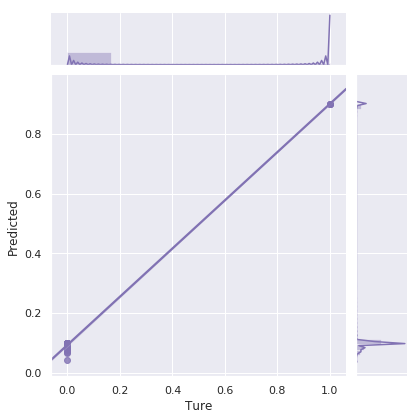

In [153]:
y_rbf=regr.predict(X)

data=pd.DataFrame([y,y_rbf], index=["Ture", "Predicted"])
data=data.T
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("Ture", "Predicted", data=data, kind="reg",color="m")

In [39]:
DublinTowns = "https://raw.githack.com/johnsg811/Dublin-Towns/master/dublintowns.csv"
DublinTownsdf =  pd.read_csv(DublinTowns)
DublinTownsdf.tail()

,name,eircode,latitude,longitude,postal_town
579,Sutton South,D13,53.37021,-6.09392,Dublin
580,Swords,K67,53.45575,-6.21975,Swords
581,Swords Demesne,K67,53.45626,-6.21751,Swords
582,Swords Glebe,K67,53.45750,-6.22520,Swords
583,Tallaght,D24,53.28881,-6.35571,Dublin


In [40]:
DublinTownsdf.rename(columns={'name': 'Neighborhood'}, inplace=True)
DublinTownsdf.rename(columns={'latitude': 'Latitude'}, inplace=True)
DublinTownsdf.rename(columns={'longitude': 'Longitude'}, inplace=True)

DublinTownsdf.tail()


,Neighborhood,eircode,Latitude,Longitude,postal_town
579,Sutton South,D13,53.37021,-6.09392,Dublin
580,Swords,K67,53.45575,-6.21975,Swords
581,Swords Demesne,K67,53.45626,-6.21751,Swords
582,Swords Glebe,K67,53.45750,-6.22520,Swords
583,Tallaght,D24,53.28881,-6.35571,Dublin


In [41]:
dublin_venues = getNearbyVenues(names=DublinTownsdf['Neighborhood'],
                                   latitudes=DublinTownsdf['Latitude'],
                                   longitudes=DublinTownsdf['Longitude'],
                                  radius=radius)

Abbeyville
Abbotstown
Adamstown
Aderrig
Aghfarrell
Allagour
Allenswood
Annaghaskin
Annfield
Annsbrook
Ardgillan Demesne
Ardla
Artane
Ashfield
Ashtown
Aske
Astagob
Athgoe
Athgoe North
Athgoe South
Auburn
Aungierstown And Ballybane
Backstown
Backwestonpark
Badgerhill
Balally
Balbriggan
Balcarrick
Balcultry
Balcunnin
Balcurris
Baldongan
Baldonnell Little
Baldonnell Lower
Baldonnell Upper
Baldoyle
Baldrumman
Baldurgan
Baldwinstown
Balgaddy
Balgriffin
Balgriffin Park
Balheary
Balheary Demesne
Ballaghstown
Ballalease North
Ballalease South
Ballalease West
Balleally East
Balleally West
Ballinascorney Lower
Ballinascorney Upper
Ballinclea
Ballinteer
Ballisk
Ballisk Common
Ballough
Ballsbridge
Ballustree
Ballybane
Ballybetagh
Ballyboden
Ballycoolen
Ballycorus
Ballycragh
Ballycullen
Ballydowd
Ballyedmonduff
Ballyfermot
Ballyfermot Upper
Ballyhack
Ballyhavil
Ballykea
Ballymacartle
Ballymadrough
Ballymadun
Ballymaguire
Ballymaice
Ballymakaily
Ballyman
Ballymana
Ballymanaggin
Ballymastone
Ballymore

In [42]:
print(dublin_venues.shape)
dublin_venues.head()

(36247, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeyville,53.42894,-6.18436,Malahide Castle,53.444972,-6.162569,Castle
1,Abbeyville,53.42894,-6.18436,Malahide Castle Park,53.445519,-6.159611,Park
2,Abbeyville,53.42894,-6.18436,Malahide Castle Walled Garden,53.444991,-6.162466,Garden
3,Abbeyville,53.42894,-6.18436,The Garden House,53.438380,-6.168713,Garden Center
4,Abbeyville,53.42894,-6.18436,Fr Collins Park,53.405387,-6.160541,Park


In [82]:
dublin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeyville,53.42894,-6.18436,Malahide Castle,53.444972,-6.162569,Castle
1,Abbeyville,53.42894,-6.18436,Malahide Castle Park,53.445519,-6.159611,Park
2,Abbeyville,53.42894,-6.18436,Malahide Castle Walled Garden,53.444991,-6.162466,Garden
3,Abbeyville,53.42894,-6.18436,The Garden House,53.438380,-6.168713,Garden Center
4,Abbeyville,53.42894,-6.18436,Fr Collins Park,53.405387,-6.160541,Park


In [84]:
dublin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbeyville,100,100,100,100,100,100
Abbotstown,100,100,100,100,100,100
Adamstown,48,48,48,48,48,48
Aderrig,51,51,51,51,51,51
Aghfarrell,5,5,5,5,5,5
Allagour,29,29,29,29,29,29
Allenswood,56,56,56,56,56,56
Annaghaskin,76,76,76,76,76,76
Annfield,100,100,100,100,100,100


In [85]:
print('There are {} uniques categories.'.format(len(dublin_venues['Venue Category'].unique())))

There are 224 uniques categories.


In [86]:
# one hot encoding
dublin_onehot = pd.get_dummies(dublin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dublin_onehot['Neighborhood'] = dublin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dublin_venues.columns[-1]] + list(dublin_venues.columns[:-1])
columbus_onehot = dublin_venues[fixed_columns]

dublin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeyville,53.42894,-6.18436,Malahide Castle,53.444972,-6.162569,Castle
1,Abbeyville,53.42894,-6.18436,Malahide Castle Park,53.445519,-6.159611,Park
2,Abbeyville,53.42894,-6.18436,Malahide Castle Walled Garden,53.444991,-6.162466,Garden
3,Abbeyville,53.42894,-6.18436,The Garden House,53.438380,-6.168713,Garden Center
4,Abbeyville,53.42894,-6.18436,Fr Collins Park,53.405387,-6.160541,Park


In [87]:
dublin_grouped = dublin_onehot.groupby('Neighborhood').sum().reset_index()
dublin_grouped.head()

,Neighborhood,Airport,Airport Lounge,Airport Service,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Warehouse Store,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Abbeyville,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotstown,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adamstown,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aderrig,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aghfarrell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
dublin_grouped[['Neighborhood','Indian Restaurant']]

,Neighborhood,Indian Restaurant
0,Abbeyville,2
1,Abbotstown,1
2,Adamstown,0
3,Aderrig,0
4,Aghfarrell,0
5,Allagour,1
6,Allenswood,0
7,Annaghaskin,0
8,Annfield,0
9,Annsbrook,0


In [154]:
template=pd.DataFrame(columns=Toronto_grouped.columns)
template=template.merge(dublin_grouped,how='outer')

In [155]:
template.shape

(584, 277)

In [156]:
dublin_templated=template[Toronto_grouped.columns].copy()
dublin_templated.fillna(0,inplace=True)
dublin_templated.head()

,Neighborhood,New American Restaurant,Nightclub,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,...,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Museum,Music School,Music Store,Nail Salon,Cluster Labels
0,Abbeyville,0,1,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Abbotstown,0,0,0,0,0,0,4,0,0,...,0,0,0,0,2,0,0,0,0,0
2,Adamstown,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Aderrig,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Aghfarrell,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_test=dublin_templated.drop(['Neighborhood','Indian Restaurant'],axis=1)
y_current=dublin_templated['Indian Restaurant']

In [158]:
y_predict=regr.predict(X_test)

ValueError: X.shape[1] = 177 should be equal to 176, the number of features at training time

In [159]:
dublin_data=pd.DataFrame([dublin_templated['Neighborhood'],y_current,y_rbf], index=['Neighborhood',"Current", "Predicted"])
dublin_data=dublin_data.T
dublin_data.set_index('Neighborhood').head()

,Current,Predicted
Neighborhood,,
Abbeyville,2,0.0918238
Abbotstown,1,0.099934
Adamstown,0,0.0998891
Aderrig,0,0.099078
Aghfarrell,0,0.100124


In [161]:
#dublin_data.Predicted=dublin_data.Predicted.astype(float).round().astype(int)


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [162]:
dublin_data['Difference']=dublin_data['Predicted']-dublin_data['Current']
dublin_data.head()

,Neighborhood,Current,Predicted,Difference
0,Abbeyville,2,0.0918238,-1.90818
1,Abbotstown,1,0.099934,-0.900066
2,Adamstown,0,0.0998891,0.0998891
3,Aderrig,0,0.099078,0.099078
4,Aghfarrell,0,0.100124,0.100124


In [163]:
dublin_data.sort_values('Difference',ascending=False,inplace=True)
dublin_data.head(10)

,Neighborhood,Current,Predicted,Difference
22,Backstown,0,0.90039,0.90039
29,Balcunnin,0,0.900178,0.900178
19,Athgoe South,0,0.100342,0.100342
15,Aske,0,0.100311,0.100311
7,Annaghaskin,0,0.10018,0.10018
9,Annsbrook,0,0.10016,0.10016
4,Aghfarrell,0,0.100124,0.100124
38,Baldwinstown,0,0.100091,0.100091
11,Ardla,0,0.100049,0.100049
14,Ashtown,0,0.100026,0.100026


Text(0, 0.5, '# of Indian Restaurant')

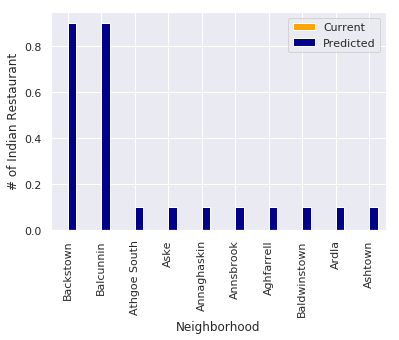

In [164]:
ax=dublin_data.set_index('Neighborhood').iloc[:10,0:2].plot(kind='bar',color=['orange','darkblue'])
ax.set_ylabel("# of Indian Restaurant")

In [167]:
dublin_plot=dublin_data.iloc[:10,:].merge(DublinTownsdf,how='left',on='Neighborhood')
dublin_plot

,Neighborhood,Current,Predicted,Difference,eircode,Latitude,Longitude,postal_town
0,Backstown,0,0.90039,0.90039,W23,53.34694,-6.48843,Maynooth
1,Balcunnin,0,0.900178,0.900178,K34,53.55880,-6.15237,Skerries
2,Athgoe South,0,0.100342,0.100342,D22,53.28451,-6.53060,Dublin
3,Aske,0,0.100311,0.100311,A98,53.21904,-6.12379,Bray
4,Annaghaskin,0,0.10018,0.10018,A98,53.21081,-6.17364,Bray
5,Annsbrook,0,0.10016,0.10016,A41,53.52455,-6.23383,Ballyboughal
6,Aghfarrell,0,0.100124,0.100124,D24,53.23009,-6.41830,Dublin
7,Baldwinstown,0,0.100091,0.100091,A42,53.56552,-6.35212,Garristown
8,Ardla,0,0.100049,0.100049,K34,53.57530,-6.13667,Skerries
9,Ashtown,0,0.100026,0.100026,D07,53.37251,-6.33164,Dublin


In [171]:

# create map of Toronto using latitude and longitude values
dublin_latitude=53.3302
dublin_longitude=-6.3106

map_dublin = folium.Map(location=[dublin_latitude, dublin_longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(dublin_plot['Latitude'], dublin_plot['Longitude'], dublin_plot['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dublin) 
    
map_dublin